# Practice. Time-series data prediction

### Import package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Generate time-series data

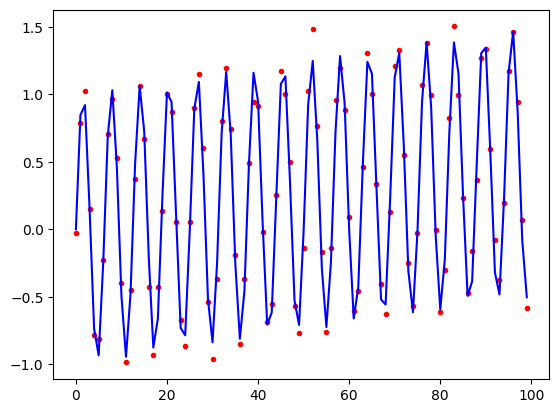

In [2]:
data_len = 1000

data_time_series = np.sin(np.arange(data_len)) + np.random.normal(0, 0.1, data_len) + np.arange(data_len)/200

plt.plot(data_time_series[0:100], 'r.')
plt.plot(range(100), np.sin(np.arange(100)) + np.arange(100)/200, 'b')
plt.show()

## MLP model

### data preprocessing

In [3]:
data_matrix = []
seq_len = 3

for i in range (0, data_len - seq_len):
    tmp_data = data_time_series[i:i+seq_len+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(997, 4)
[[-0.02676191  0.78314506  1.02115891  0.15259794]
 [ 0.78314506  1.02115891  0.15259794 -0.78363498]
 [ 1.02115891  0.15259794 -0.78363498 -0.81130417]
 ...
 [ 5.76910231  5.66420059  4.89387336  4.20302966]
 [ 5.66420059  4.89387336  4.20302966  4.11171033]
 [ 4.89387336  4.20302966  4.11171033  5.1110061 ]]


### train/test split

In [4]:
x = data_matrix_np[:, 0:seq_len]
y = data_matrix_np[:, seq_len]
print(x.shape)
print(y.shape)

n_train_data = 750

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

(997, 3)
(997,)


### keras sequential API

In [5]:
from keras import layers, models
from keras.losses import mean_squared_error

input_shape = (seq_len, )

mlp_seq = models.Sequential()
mlp_seq.add(layers.Dense(units = 5, activation = 'tanh', input_shape = input_shape))
mlp_seq.add(layers.Dense(units = 10, activation = 'tanh'))
mlp_seq.add(layers.Dense(units = 1, activation = 'linear'))

mlp_seq.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
mlp_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = mlp_seq.fit(x_train, y_train, validation_data=[x_test, y_test], batch_size = 16, epochs = 100)

Epoch 1/100
47/47 [==============================] - 2s 9ms/step - loss: 1.0914 - mean_squared_error: 1.0914 - val_loss: 3.6531 - val_mean_squared_error: 3.6531
Epoch 2/100
47/47 [==============================] - 0s 5ms/step - loss: 0.9232 - mean_squared_error: 0.9232 - val_loss: 3.4207 - val_mean_squared_error: 3.4207
Epoch 3/100
47/47 [==============================] - 0s 5ms/step - loss: 0.8686 - mean_squared_error: 0.8686 - val_loss: 3.2065 - val_mean_squared_error: 3.2065
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 0.8323 - mean_squared_error: 0.8323 - val_loss: 3.1228 - val_mean_squared_error: 3.1228
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.7993 - mean_squared_error: 0.7993 - val_loss: 3.0503 - val_mean_squared_error: 3.0503
Epoch 6/100
47/47 [==============================] - 0s 5ms/step - loss: 0.7681 - mean_squared_error: 0.7681 - val_loss: 3.0584 - val_mean_squared_error: 3.0584
Epoch 7/100
47/47 [===============

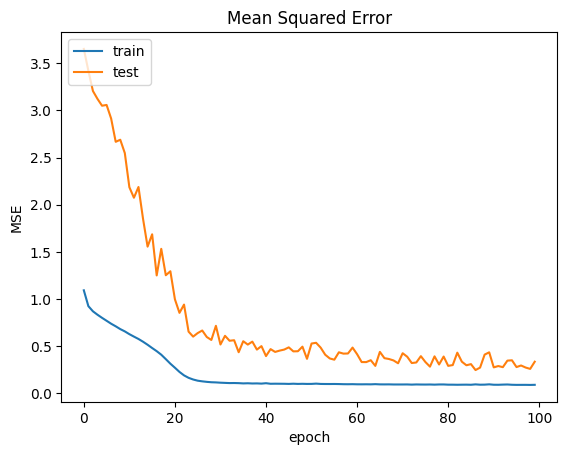

In [7]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

8/8 [==============================] - 0s 2ms/step


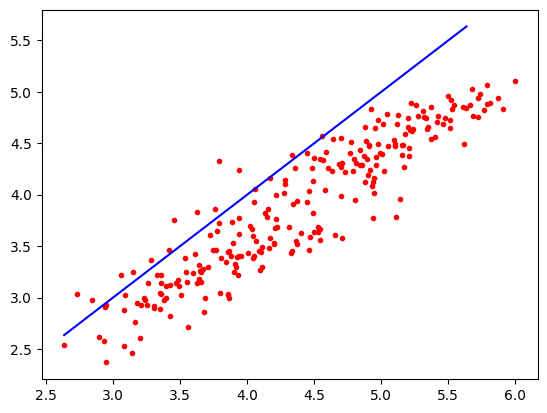

In [8]:
plt.plot(y_test, mlp_seq.predict(x_test), 'r.')
plt.plot(np.arange(min(y_test), max(y_test)), np.arange(min(y_test), max(y_test)), 'b')
plt.show()

8/8 [==============================] - 0s 2ms/step


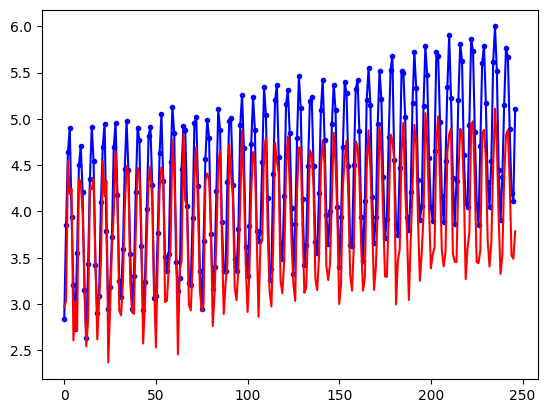

In [9]:
plt.plot(range(y_test.shape[0]), y_test, 'b.-')
plt.plot(range(y_test.shape[0]), mlp_seq.predict(x_test), 'r-')
plt.show()

## LSTM (many to many)

### data preprocessing

In [10]:
rnn_sequence_len = 4
data_dim = 3

x = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:data_dim]
y = data_matrix_np[0:data_matrix_np.shape[0]-1, data_dim]
print(x.shape)
print(y.shape)

x = np.reshape(x, (-1, rnn_sequence_len, data_dim))
y = np.reshape(y, (-1, rnn_sequence_len, 1))
print(x.shape)
print(y.shape)

(996, 3)
(996,)
(249, 4, 3)
(249, 4, 1)


### train/test split

In [11]:
n_train_data = 200

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 4, 3)
(49, 4, 3)
(200, 4, 1)
(49, 4, 1)


### keras functional API

In [12]:
input_shape = (x_train[0].shape)

In [13]:
input = layers.Input(input_shape)
rnn_layer = layers.LSTM(10, return_sequences=True)(input)
output = layers.TimeDistributed(layers.Dense(1, activation='linear'))(rnn_layer)

rnn_func = models.Model(input, output)

In [14]:
rnn_func.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
rnn_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 4, 10)             560       
                                                                 
 time_distributed (TimeDistr  (None, 4, 1)             11        
 ibuted)                                                         
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = rnn_func.fit(x_train, y_train, validation_data=[x_test, y_test], batch_size = 16, epochs = 100)

Epoch 1/100
13/13 [==============================] - 3s 46ms/step - loss: 6.1392 - mean_squared_error: 6.1392 - val_loss: 20.3788 - val_mean_squared_error: 20.3788
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 5.4933 - mean_squared_error: 5.4933 - val_loss: 18.7677 - val_mean_squared_error: 18.7677
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 4.8825 - mean_squared_error: 4.8825 - val_loss: 17.1350 - val_mean_squared_error: 17.1350
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 4.2956 - mean_squared_error: 4.2956 - val_loss: 15.4644 - val_mean_squared_error: 15.4644
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 3.7389 - mean_squared_error: 3.7389 - val_loss: 13.7405 - val_mean_squared_error: 13.7405
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 3.1917 - mean_squared_error: 3.1917 - val_loss: 12.0918 - val_mean_squared_error: 12.0918
Epoch 7/100
13/13 [==

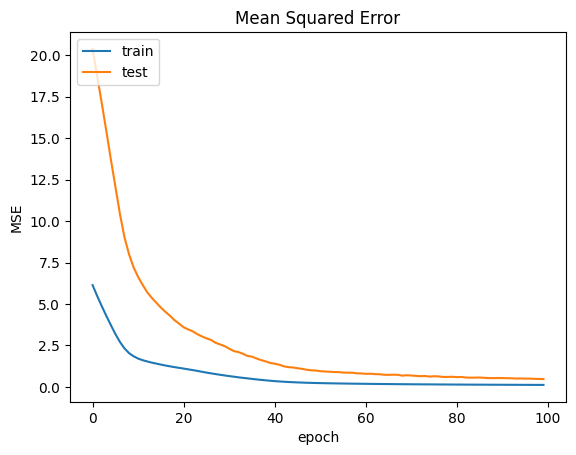

In [16]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2/2 [==============================] - 0s 7ms/step


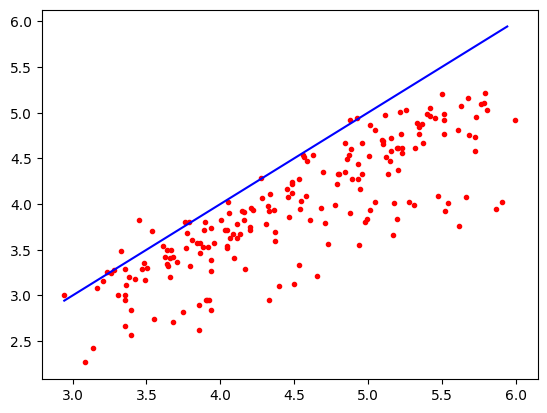

In [17]:
y_test_reshape = np.reshape(y_test, (-1, 1))

plt.plot(y_test_reshape, np.reshape(rnn_func.predict(x_test), (-1, 1)), 'r.')
plt.plot(np.arange(min(y_test_reshape), max(y_test_reshape)), 
         np.arange(min(y_test_reshape), max(y_test_reshape)), 'b')
plt.show()

2/2 [==============================] - 0s 4ms/step


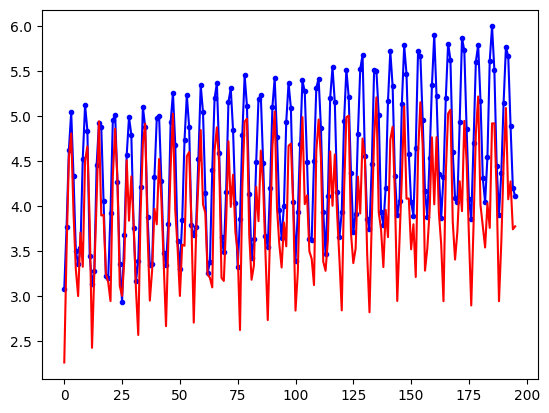

In [18]:
plt.plot(range(y_test_reshape.shape[0]), y_test_reshape, 'b.-')
plt.plot(range(y_test_reshape.shape[0]), np.reshape(rnn_func.predict(x_test), (-1, 1)), 'r-')
plt.show()

## LSTM (many to one)

### data preprocessing

In [19]:
data_matrix = []

for i in range (0, data_len - data_dim*rnn_sequence_len):
    tmp_data = data_time_series[i:i+data_dim*rnn_sequence_len+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(988, 13)
[[-0.02676191  0.78314506  1.02115891 ... -0.39519198 -0.98704383
  -0.45306824]
 [ 0.78314506  1.02115891  0.15259794 ... -0.98704383 -0.45306824
   0.36890096]
 [ 1.02115891  0.15259794 -0.78363498 ... -0.45306824  0.36890096
   1.06415748]
 ...
 [ 4.04731865  4.54443772  5.61694793 ...  5.66420059  4.89387336
   4.20302966]
 [ 4.54443772  5.61694793  5.99721388 ...  4.89387336  4.20302966
   4.11171033]
 [ 5.61694793  5.99721388  5.51380933 ...  4.20302966  4.11171033
   5.1110061 ]]


In [20]:
x = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:data_dim*rnn_sequence_len]
y = data_matrix_np[0:data_matrix_np.shape[0]-1, data_dim*rnn_sequence_len]
print(x.shape)
print(y.shape)

x = np.reshape(x, (-1, rnn_sequence_len, data_dim))
print(x.shape)

(987, 12)
(987,)
(987, 4, 3)


### train/test split

In [21]:
n_train_data = 750

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 4, 3)
(237, 4, 3)
(750,)
(237,)


### keras functional API

In [22]:
input_shape = (x_train[0].shape)

rnn_mto1_func = models.Sequential()
rnn_mto1_func.add(layers.Bidirectional(layers.LSTM(10), input_shape=input_shape))
rnn_mto1_func.add(layers.Dense(1, activation='linear'))

rnn_mto1_func.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
rnn_mto1_func.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 20)               1120      
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [23]:
# input = layers.Input(input_shape)
# rnn_layer = layers.LSTM(10, return_sequences=False)(input)
# output = layers.Dense(1, activation='linear')(rnn_layer)

# rnn_mto1_func = models.Model(input, output)

# rnn_mto1_func.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
# rnn_mto1_func.summary()

In [24]:
history = rnn_mto1_func.fit(x_train, y_train, validation_data=[x_test, y_test], batch_size = 16, epochs = 100)

Epoch 1/100
47/47 [==============================] - 5s 36ms/step - loss: 3.1690 - mean_squared_error: 3.1690 - val_loss: 7.7276 - val_mean_squared_error: 7.7276
Epoch 2/100
47/47 [==============================] - 0s 10ms/step - loss: 1.1484 - mean_squared_error: 1.1484 - val_loss: 4.1453 - val_mean_squared_error: 4.1453
Epoch 3/100
47/47 [==============================] - 0s 10ms/step - loss: 0.7791 - mean_squared_error: 0.7791 - val_loss: 3.0140 - val_mean_squared_error: 3.0140
Epoch 4/100
47/47 [==============================] - 0s 10ms/step - loss: 0.6242 - mean_squared_error: 0.6242 - val_loss: 2.1564 - val_mean_squared_error: 2.1564
Epoch 5/100
47/47 [==============================] - 0s 7ms/step - loss: 0.4889 - mean_squared_error: 0.4889 - val_loss: 1.5216 - val_mean_squared_error: 1.5216
Epoch 6/100
47/47 [==============================] - 0s 5ms/step - loss: 0.3388 - mean_squared_error: 0.3388 - val_loss: 1.0877 - val_mean_squared_error: 1.0877
Epoch 7/100
47/47 [===========

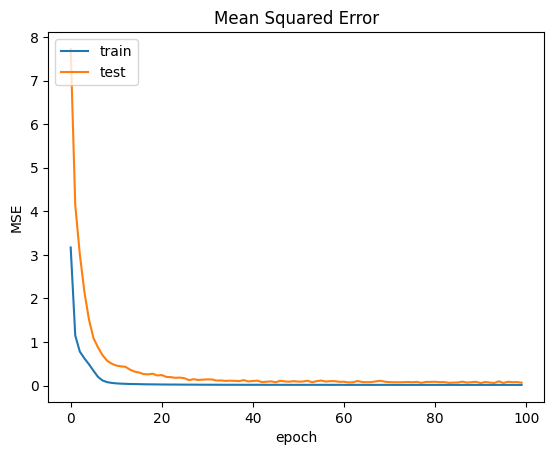

In [25]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

8/8 [==============================] - 1s 3ms/step


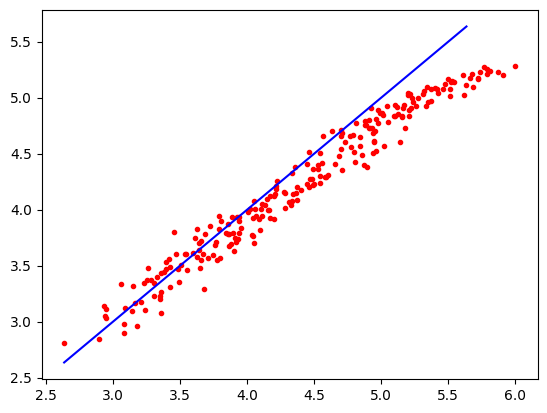

In [26]:
plt.plot(y_test, rnn_mto1_func.predict(x_test), 'r.')
plt.plot(np.arange(min(y_test), max(y_test)), 
         np.arange(min(y_test), max(y_test)), 'b')
plt.show()

8/8 [==============================] - 0s 3ms/step


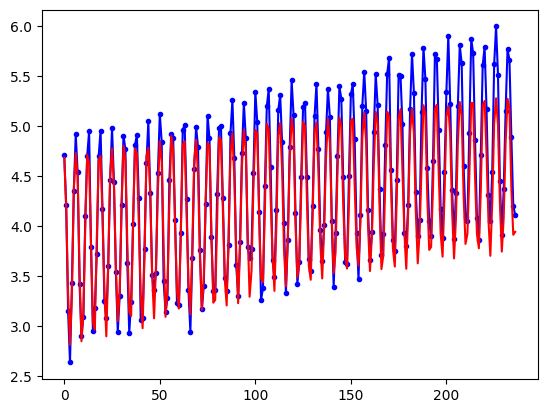

In [27]:
plt.plot(range(y_test.shape[0]), y_test, 'b.-')
plt.plot(range(y_test.shape[0]), rnn_mto1_func.predict(x_test), 'r-')
plt.show()

## GRU

In [28]:
# # Generate some random time-series data
# data = np.random.random((1000, 1))

# # Prepare the input and target data
# input_data = data[:-1]
# target_data = data[1:]

# # Reshape the data to fit the GRU input shape
# input_data = input_data.reshape(input_data.shape[0], 1, 1)

In [36]:
# Create the model
model = models.Sequential()
model.add(layers.GRU(32, input_shape=input_shape))
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 32)                3552      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 32, epochs = 100)

Epoch 1/100
24/24 [==============================] - 3s 26ms/step - loss: 1.1401 - mean_squared_error: 1.1401 - val_loss: 1.5522 - val_mean_squared_error: 1.5522
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.6175 - mean_squared_error: 0.6175 - val_loss: 2.0153 - val_mean_squared_error: 2.0153
Epoch 3/100
24/24 [==============================] - 0s 10ms/step - loss: 0.4751 - mean_squared_error: 0.4751 - val_loss: 1.4195 - val_mean_squared_error: 1.4195
Epoch 4/100
24/24 [==============================] - 0s 9ms/step - loss: 0.3395 - mean_squared_error: 0.3395 - val_loss: 1.1260 - val_mean_squared_error: 1.1260
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 0.1983 - mean_squared_error: 0.1983 - val_loss: 0.9317 - val_mean_squared_error: 0.9317
Epoch 6/100
24/24 [==============================] - 0s 11ms/step - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.6536 - val_mean_squared_error: 0.6536
Epoch 7/100
24/24 [============

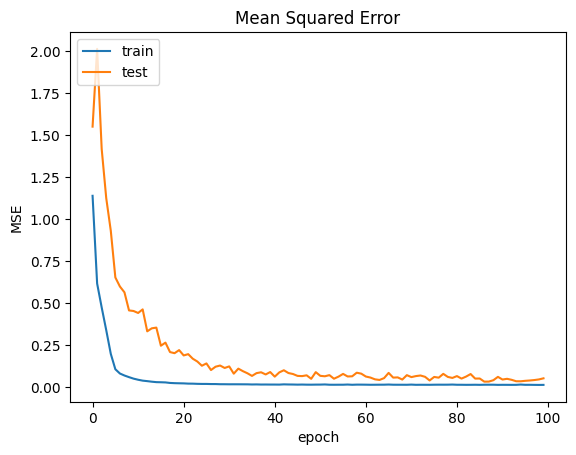

In [38]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

8/8 [==============================] - 0s 2ms/step


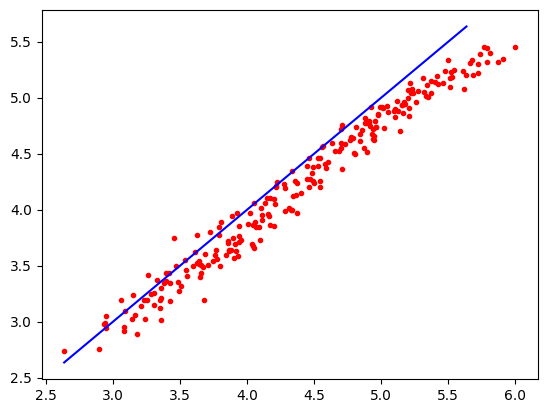

In [39]:
plt.plot(y_test, model.predict(x_test), 'r.')
plt.plot(np.arange(min(y_test), max(y_test)), 
         np.arange(min(y_test), max(y_test)), 'b')
plt.show()

8/8 [==============================] - 0s 2ms/step


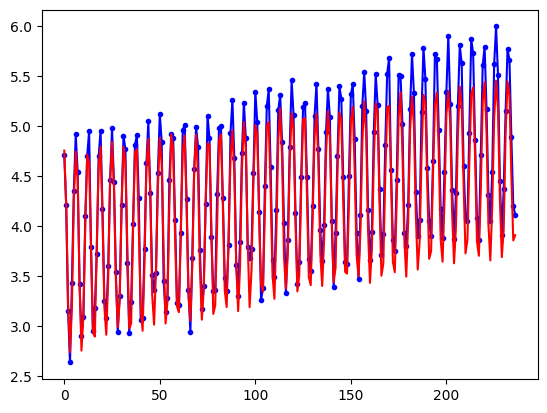

In [40]:
plt.plot(range(y_test.shape[0]), y_test, 'b.-')
plt.plot(range(y_test.shape[0]), model.predict(x_test), 'r-')
plt.show()